# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'> This code leverages K-means algorithm for image segmentation.

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import io
from PIL import Image
import numpy.matlib
import numpy as np
import random
import io

### <span style='font-family:"Times New Roman"'>Implemented Functions:  

In [2]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [3]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [4]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

### <span style='font-family:"Times New Roman"'>Reading image and preparing it:  

In [5]:
image = imread("nature-1.png")
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = np.reshape(image, (image.shape[0] * image.shape[1],image.shape[2])) 

### <span style='font-family:"Times New Roman"'>Initializing K-means:  

In [6]:
K = int(input("Enter number of clusters (In this problem = 4) : "))
max_iters = int(input("Enter maximum number of iterations(In this problem = 50) : "))

Enter number of clusters (In this problem = 4) : 4
Enter maximum number of iterations(In this problem = 50) : 50


In [7]:
initial_centroids = random.sample(list(X),K) #Selects K (number of clusters) random numbers from image
centroids,idx = run_kMean(X,initial_centroids,max_iters)
idx.resize((np.size(X,0),1))
center = centroids
res = center[idx.flatten()]
result_image = res.reshape((image.shape))

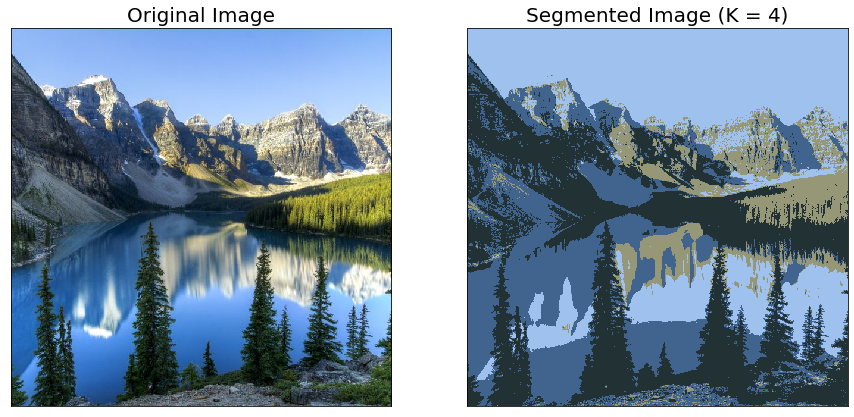

In [8]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image', fontsize=20), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),
plt.imshow(result_image)
plt.title('Segmented Image (K = %i)' % K, fontsize=20), plt.xticks([]), plt.yticks([])
plt.show()